## Overview

Short and sweet, a QQ plot is used to check the normality of a given data distribution.

Their construction is pretty straight-forward. Essentially you:

(Borrowing visuals from [StatQuest](https://www.youtube.com/watch?v=okjYjClSjOg)):

1. Sort your data and label each point as its own quantile (10th, 42nd, 99th, etc). Normalized data is your cleanest way to go here.

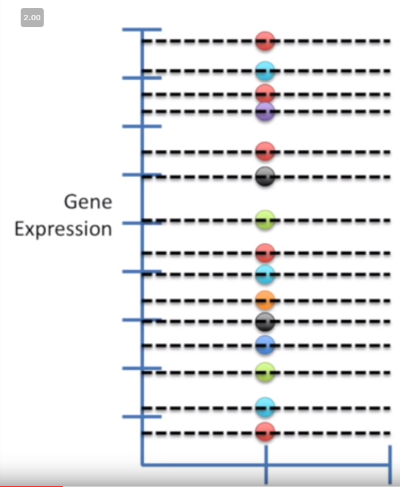

In [1]:
from IPython.display import Image
Image('../images/qq_data.PNG')

2. Then, using the quantiles from step (1), fire up your vanilla `N ~ (0, 1)` distribution, and sample the same quantiles from *it*

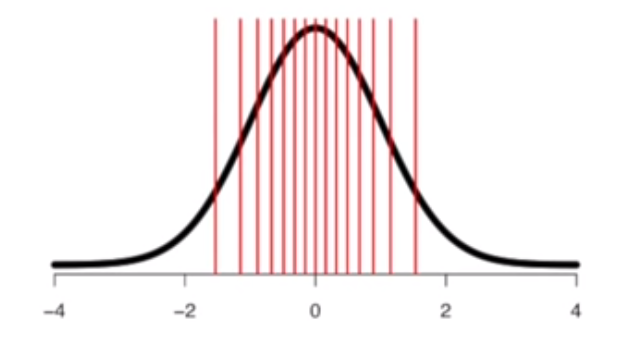

In [2]:
Image('../images/qq_theory.PNG')

**Note**: Because quantiles are a strictly ordinal measure (think median vs mean), comparing quantiles to quantiles across different distributions may very well yield inconsistent values.

## Generating QQ Plots

For starters, we'll download an interesting dataset using `yellowbrick` and ignore like 80% of it, lol

In [3]:
from yellowbrick.datasets import load_nfl

dataset = load_nfl(return_dataset=True)
df = dataset.to_dataframe()

The dataset describes overall Receiving stats for the 2018 season. [There's a lot here](https://www.pro-football-reference.com/years/2018/receiving.htm).

In [4]:
df.head()

,Rk,Player,Id,Tm,Age,G,GS,Tgt,Rec,Ctch_Rate,...,FirstTeamAllPro,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
0,1,Michael Thomas,ThomMi05,NOR,25,16,16,147,125,0.850,...,1,0,0,0,0,0,0,0,0,1
1,2,Zach Ertz,ErtzZa00,PHI,28,16,16,156,116,0.744,...,0,0,0,0,0,0,0,0,1,0
2,3,DeAndre Hopkins,HopkDe00,HOU,26,16,16,163,115,0.706,...,1,0,0,0,0,0,0,0,0,1
3,4,Julio Jones,JoneJu02,ATL,29,16,16,170,113,0.665,...,0,0,0,0,0,0,0,0,0,1
4,5,Adam Thielen,ThieAd00,MIN,28,16,16,153,113,0.739,...,0,0,0,0,0,0,0,0,0,1


For the sake of demonstration, let's consider total yardage.

This skewed distribution makes a ton of sense when you consider how many players don't get a lot of touches during the season.

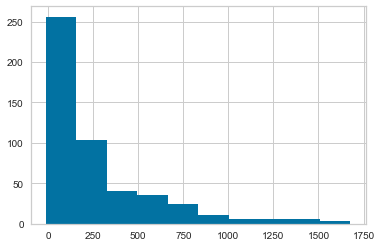

In [5]:
df['Yds'].hist();

Now we'll fire up `statsmodels.api`, which has a really clean utility for generating QQ plots.

Go figure this distribution isn't very normal.

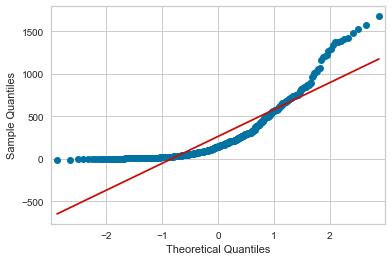

In [6]:
from statsmodels.api import qqplot

qqplot(df['Yds'], line='s');

The "Longest Reception" metric, on the other hand, looks a bit more palatable-- what, because it has an inherent upper-bound at the length of a football field.

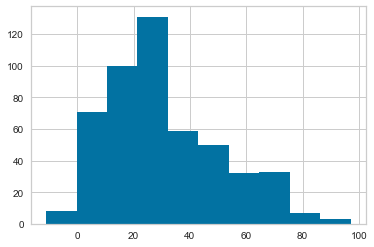

In [7]:
df['Lng'].hist();

Not perfect, but certainly normal-er!

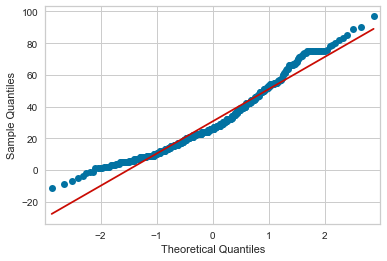

In [8]:
qqplot(df['Lng'], line='s');

... but also runs into having a negative-yard-longest-reception?

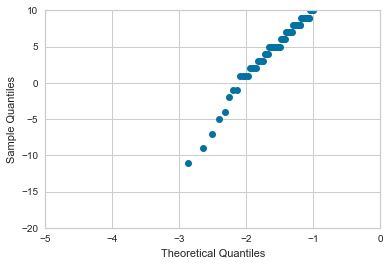

In [9]:
fig = qqplot(df['Lng'])
fig.axes[0].set_xlim([-5, 0])
fig.axes[0].set_ylim([-20, 10]);

No, that's accurate

In [10]:
df['Lng'].min()

-11

lol

In [11]:
df[df['Lng'] == -11]['Player']

492    Russell Wilson
Name: Player, dtype: object